<a href="https://colab.research.google.com/github/henterm/linked-blog-starter-md/blob/main/lab01_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2024-11-17 12:39:28--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2024-11-17 12:39:28 (4.40 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,735,86,37,77,144,54,7,154,43,19,127,179,352,145,71,14,13,186,191
1,265,80,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
2,683,110,56,109,199,57,5,251,27,27,169,272,928,268,82,11,10,183,183
3,333,86,42,65,125,54,7,150,45,19,140,171,327,172,85,2,8,180,182
4,349,89,40,69,147,58,6,132,50,18,137,155,260,151,61,16,6,203,209
5,605,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
6,478,94,45,89,213,71,5,186,35,22,145,204,533,182,71,4,13,195,198
7,26,83,36,54,119,57,6,128,53,18,125,143,238,139,82,6,3,179,183
8,745,85,43,69,141,62,7,152,44,19,145,178,341,179,84,1,4,181,184
9,682,90,46,73,137,58,11,161,43,20,158,170,373,186,76,0,9,182,193


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.679417,93.885246,45.10929,82.772313,169.546448,61.437158,8.367942,170.648452,40.515483,20.721311,148.362477,189.805100,449.542805,175.867031,72.320583,6.431694,12.730419,188.794171,195.584699
std,248.126864,8.524521,6.28366,15.976405,33.311187,7.239022,3.644733,33.916416,7.822753,2.663062,14.844379,31.495167,181.210036,32.774704,6.722820,5.086602,9.021882,6.123388,7.335210
min,1.000000,73.000000,33.00000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,87.000000,40.00000,70.000000,142.000000,56.000000,7.000000,148.000000,32.000000,19.000000,137.000000,168.000000,322.000000,151.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,437.000000,93.000000,44.00000,80.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,367.000000,175.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,648.000000,100.000000,51.00000,100.000000,197.000000,65.000000,10.000000,203.000000,46.000000,23.000000,161.000000,219.000000,622.000000,199.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,59.00000,112.000000,322.000000,133.000000,49.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,118.000000,22.000000,38.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
# Проверяем наличие пропущенных значений в тренировочных данных
missing_values = X_train_pd.isnull().sum().sum()
print(f"Всего пропущенных значений в X_train: {missing_values}")


Всего пропущенных значений в X_train: 0


**Объяснение:**
Этот шаг проверяет, есть ли пропущенные значения в данных. Если такие значения есть, их можно заполнить методами, например, средним, медианой или модой.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Кодируем целевую переменную
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Проверяем, как закодированы классы
print(f"Классы целевой переменной: {label_encoder.classes_}")


Классы целевой переменной: ['bus' 'opel' 'saab' 'van']


**Объяснение:**



*   LabelEncoder преобразует категории в числовые значения (например, class1 -> 0, class2 -> 1).
*   Это позволяет использовать целевую переменную в большинстве алгоритмов машинного обучения.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Инициализируем стандартный масштабатор
scaler = StandardScaler()

# Масштабируем тренировочные и тестовые данные
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Данные после масштабирования:")
print(f"Среднее первого признака (X_train_scaled): {X_train_scaled[:, 0].mean():.2f}")
print(f"Стандартное отклонение первого признака (X_train_scaled): {X_train_scaled[:, 0].std():.2f}")


Данные после масштабирования:
Среднее первого признака (X_train_scaled): -0.00
Стандартное отклонение первого признака (X_train_scaled): 1.00


**Объяснение:**


*   StandardScaler масштабирует данные так, чтобы среднее значение каждого признака стало равным 0, а стандартное отклонение — 1.
*   Это особенно важно для алгоритмов, таких как логистическая регрессия и SVM, которые чувствительны к масштабам признаков.

In [ ]:
# One-hot кодирование категориальных признаков с помощью pandas
X_train_one_hot = pd.get_dummies(pd.DataFrame(X_train_scaled), columns=[0, 1], drop_first=True)
X_test_one_hot = pd.get_dummies(pd.DataFrame(X_test_scaled), columns=[0, 1], drop_first=True)

print("Данные после one-hot кодирования:")
print(X_train_one_hot.head())


Данные после one-hot кодирования:
          2         3         4         5         6         7         8  \
0 -1.291713 -0.361632 -0.767602 -1.028308 -0.375662 -0.491315  0.317891   
1 -0.017409 -0.737528 -1.248360 -0.751775 -0.375662 -0.579848  0.573789   
2  1.734760  1.643149  0.885000 -0.613509 -0.924900  2.371266 -1.729290   
3 -0.495273 -1.113425 -1.338502 -1.028308 -0.375662 -0.609359  0.573789   
4 -0.813849 -0.862827 -0.677460 -0.475243 -0.650281 -1.140560  1.213533   

          9        10        11  ...  1_1.6572926571150264  \
0 -0.646955 -1.440408 -0.343385  ...                 False   
1 -0.646955 -0.091868 -0.597623  ...                 False   
2  2.359845  1.391526  2.612142  ...                 False   
3 -0.646955 -0.563857 -0.597623  ...                 False   
4 -1.022805 -0.766138 -1.106101  ...                 False   

   1_1.7747082809059864  1_1.8921239046969467  1_2.009539528487907  \
0                 False                 False                False   
1 

**Объяснение:**


*   One-hot кодирование заменяет категориальные признаки бинарными колонками, каждая из которых представляет одну категорию.
*   Это предотвращает трактовку категорий как упорядоченных (ordinal), что могло бы привести к ошибкам.

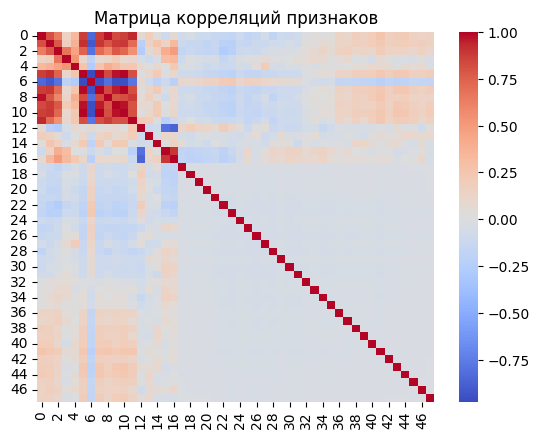

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
# Преобразуем данные обратно в DataFrame (для удобства работы с колонками)
X_train_one_hot = pd.DataFrame(X_train_one_hot)
X_test_one_hot = pd.DataFrame(X_test_one_hot)

# Убедимся, что столбцы совпадают
X_test_one_hot = X_test_one_hot.reindex(columns=X_train_one_hot.columns, fill_value=0)
# Преобразуем все имена столбцов в строки
X_train_one_hot.columns = X_train_one_hot.columns.astype(str)
X_test_one_hot.columns = X_test_one_hot.columns.astype(str)
# Удаление признаков с низкой дисперсией
variance_filter = VarianceThreshold(threshold=0.01)
X_train_var_filtered = variance_filter.fit_transform(X_train_one_hot)
X_test_var_filtered = variance_filter.transform(X_test_one_hot)

# Визуализация корреляции (опционально)
correlation_matrix = pd.DataFrame(X_train_var_filtered).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Матрица корреляций признаков")
plt.show()


**Объяснение:**



*   VarianceThreshold удаляет признаки с дисперсией ниже указанного порога.
*   Матрица корреляций помогает выявить признаки, которые сильно коррелируют друг с другом и могут быть исключены.



In [ ]:
from imblearn.over_sampling import SMOTE

# Применение SMOTE для увеличения количества меньшинств в тренировочных данных
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_var_filtered, y_train_encoded)

print(f"Распределение классов после балансировки: {np.bincount(y_train_balanced)}")


Распределение классов после балансировки: [150 150 150 150]


**Объяснение:**


*   SMOTE (Synthetic Minority Oversampling Technique) создает синтетические примеры для меньшинств, чтобы сбалансировать данные.
*   Это уменьшает вероятность того, что модель будет отдавать предпочтение большинству.

**Резюме шагов предобработки**


1.   Проверка на пропущенные значения: Убедились, что в данных нет пропусков.
2.   Кодирование целевой переменной: Преобразовали категориальные метки в числовой формат.
3.   Масштабирование признаков: Привели признаки к нулевому среднему и единичной дисперсии.
4.   One-hot кодирование: Закодировали категориальные признаки в бинарные векторы.
5.   Удаление низковариативных признаков: Уменьшили размерность, удалив неинформативные признаки.
6.   Балансировка данных: Использовали SMOTE для балансировки классов целевой переменной.







#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Настройка модели логистической регрессии
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Поиск оптимальных гиперпараметров
param_grid = {
    'C': [0.1, 1, 10],  # Регуляризация
    'penalty': ['l2', 'none']  # Тип регуляризации
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train_balanced, y_train_balanced)

# Лучшая модель
best_log_reg = grid_search.best_estimator_
print(f"Лучшие гиперпараметры: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Лучшие гиперпараметры: {'C': 10, 'penalty': 'l2'}


**Настройка и поиск гиперпараметров:**



*   Используется логистическая регрессия с заранее заданными параметрами (multi_class='multinomial', solver='saga' и др.).
*   С помощью GridSearchCV выполняется поиск лучших гиперпараметров (например, коэффициента регуляризации C).

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# Предсказания на тестовых данных
y_pred = best_log_reg.predict(X_test_var_filtered)

# Оценка метрик
f1 = f1_score(y_test_encoded, y_pred, average='macro')
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"F1 score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


F1 score: 0.7128
Accuracy: 0.7407


Оценка модели:

*   Оцениваются метрики качества (F1 и Accuracy) на тестовых данных.



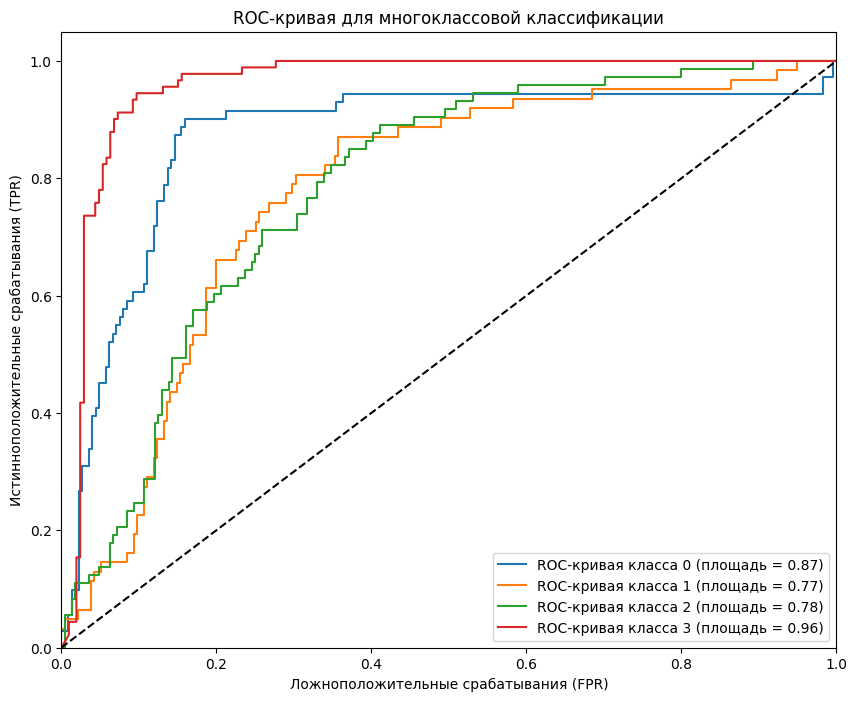

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Получение предсказанных вероятностей для тестовых данных
y_pred_proba = best_log_reg_pca.predict_proba(X_test_pca)

# Для многоклассовой классификации (one-vs-rest)
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(label_encoder.classes_)  # Количество классов

# Построение ROC-кривых для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение графика
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC-кривая класса {i} (площадь = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Диагональ
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания (FPR)')
plt.ylabel('Истинноположительные срабатывания (TPR)')
plt.title('ROC-кривая для многоклассовой классификации')
plt.legend(loc="lower right")
plt.show()


**Построение ROC-кривой:**


*   Строится ROC-кривая для анализа качества модели, включая многоклассовую классификацию (с использованием one-vs-rest подхода).



In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

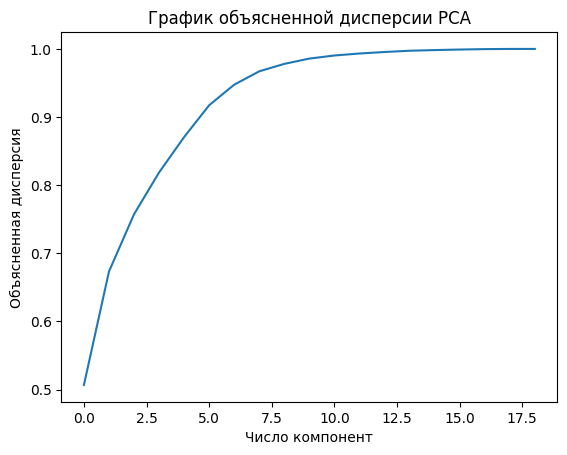

In [ ]:
from sklearn.decomposition import PCA

# Инициализируем PCA и находим компоненты
pca = PCA()
pca.fit(X_train_scaled)

# График объясненной дисперсии
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('График объясненной дисперсии PCA')
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Выбрано {n_components} компонент, которые объясняют 90% дисперсии")

Выбрано 6 компонент, которые объясняют 90% дисперсии


**Определение числа компонент:**

С помощью графика кумулятивной объясненной дисперсии (explained_variance_ratio_) выбирается число компонент, объясняющих ≥90% дисперсии.

In [ ]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

**Применение PCA:**

Обучающие и тестовые данные трансформируются в новое пространство с уменьшенным числом компонент.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_var_filtered, y_train_encoded)


In [ ]:
from sklearn.decomposition import PCA

# Инициализируем PCA
pca = PCA(n_components=6)  # Выбираем нужное количество компонент

# Применяем PCA к сбалансированным данным
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test_var_filtered)


**Обучение логистической регрессии после PCA:**

Повторяется процесс настройки и поиска гиперпараметров логистической регрессии, но уже на преобразованных с помощью PCA данных.

In [ ]:
print(f"Размеры X_train_pca: {X_train_pca.shape}")
print(f"Размеры y_train_balanced: {y_train_balanced.shape}")


Размеры X_train_pca: (600, 6)
Размеры y_train_balanced: (600,)


In [ ]:
grid_search_pca = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro')
grid_search_pca.fit(X_train_pca, y_train_balanced)

# Лучшая модель
best_log_reg_pca = grid_search_pca.best_estimator_
print(f"Лучшие гиперпараметры для PCA: {grid_search_pca.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Лучшие гиперпараметры для PCA: {'C': 10, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The s

In [ ]:
# Предсказания
y_pred_pca = best_log_reg_pca.predict(X_test_pca)

# Оценка метрик
f1_pca = f1_score(y_test_encoded, y_pred_pca, average='macro')
accuracy_pca = accuracy_score(y_test_encoded, y_pred_pca)

print(f"F1 score после PCA: {f1_pca:.4f}")
print(f"Accuracy после PCA: {accuracy_pca:.4f}")


F1 score после PCA: 0.5671
Accuracy после PCA: 0.6094


**Оценка модели:**

Вычисляются F1 и Accuracy на данных, обработанных PCA.

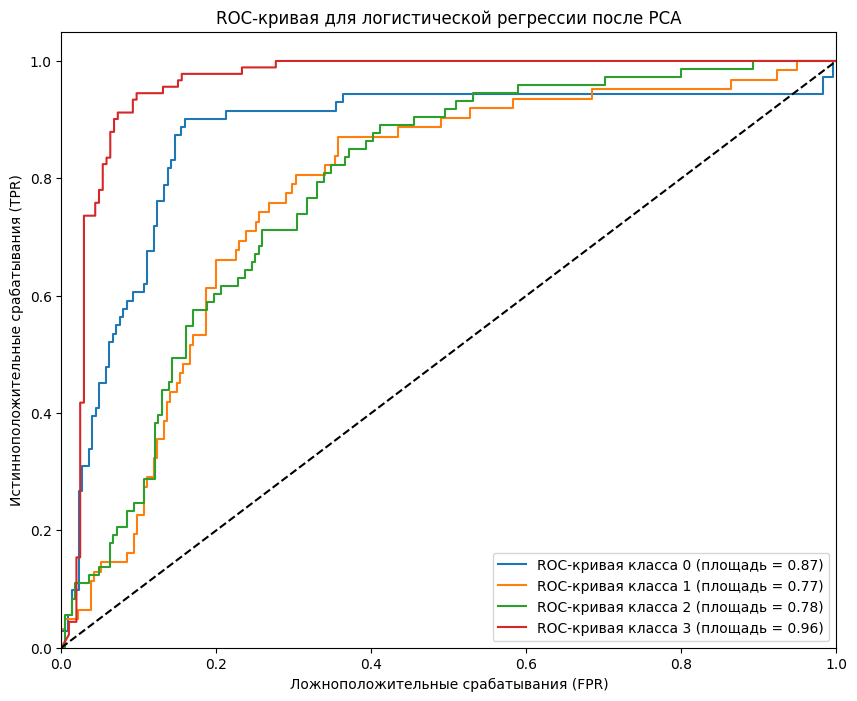

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Предсказание вероятностей для тестовых данных
y_proba_pca = best_log_reg_pca.predict_proba(X_test_pca)

# Для многоклассовой классификации (one-vs-rest)
fpr = {}
tpr = {}
roc_auc = {}

n_classes = len(label_encoder.classes_)  # Количество классов

# Построение ROC-кривых для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_proba_pca[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение графика
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC-кривая класса {i} (площадь = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Диагональ
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительные срабатывания (FPR)')
plt.ylabel('Истинноположительные срабатывания (TPR)')
plt.title('ROC-кривая для логистической регрессии после PCA')
plt.legend(loc="lower right")
plt.show()



**Построение ROC-кривой:**

Аналогично предыдущему пункту, строится ROC-кривая для модели, обученной на данных после PCA.

**Общий вид кривых:**


*   Все кривые поднимаются выше диагонали случайного угадывания (черная пунктирная линия), что говорит о том, что модель лучше случайного предсказания.
*   Классы 0 и 3 имеют лучшие результаты, так как их ROC-кривые ближе к верхнему левому углу графика.

**AUC (площадь под кривой)**


*   Класс 0: AUC = 0.87 — модель довольно хорошо классифицирует этот класс.
*   Класс 1: AUC = 0.77 — результат удовлетворительный, но классификация хуже, чем для класса 0.
*   Класс 2: AUC = 0.78 — чуть лучше, чем для класса 1, но всё ещё ниже класса 0.
*   Класс 3: AUC = 0.96 — модель отлично справляется с этим классом, так как кривая почти достигает идеального предсказания.

**Выводы по классам**


*   Класс 3 имеет явное преимущество. Это может говорить о том, что данные для этого класса наиболее легко различимы или класс имеет лучшее распределение признаков.
*   Классы 1 и 2 требуют улучшения. Возможно, для них данные недостаточно сбалансированы или признаки плохо различают эти классы.
*   Класс 0 показывает хорошую производительность, хотя и не настолько, как класс 3.


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

# Инициализация дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)

# Сетка для подбора гиперпараметра max_depth
param_grid = {'max_depth': range(1, 20)}

# Подбор гиперпараметров с использованием кросс-валидации
grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=5, scoring='f1_macro')
grid_search_tree.fit(X_train_balanced, y_train_balanced)

# Лучшая модель
best_tree_clf = grid_search_tree.best_estimator_

# Предсказание на тестовых данных
y_pred_tree = best_tree_clf.predict(X_test_var_filtered)

# Оценка качества модели
f1_tree = f1_score(y_test_encoded, y_pred_tree, average='macro')
accuracy_tree = accuracy_score(y_test_encoded, y_pred_tree)

print(f"F1-score для дерева решений: {f1_tree:.4f}")
print(f"Accuracy для дерева решений: {accuracy_tree:.4f}")
print(f"Лучшая глубина дерева: {grid_search_tree.best_params_['max_depth']}")


F1-score для дерева решений: 0.6610
Accuracy для дерева решений: 0.6835
Лучшая глубина дерева: 6


Для начала обучим решающее дерево на тех же данных, используя гиперпараметр max_depth. Найдем оптимальную глубину дерева с помощью кросс-валидации.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

Теперь создадим ансамбли из логистических регрессий и решающих деревьев, варьируя количество алгоритмов от 2 до 100 с шагом 5. Для этого будем использовать процедуру бутстрапа.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

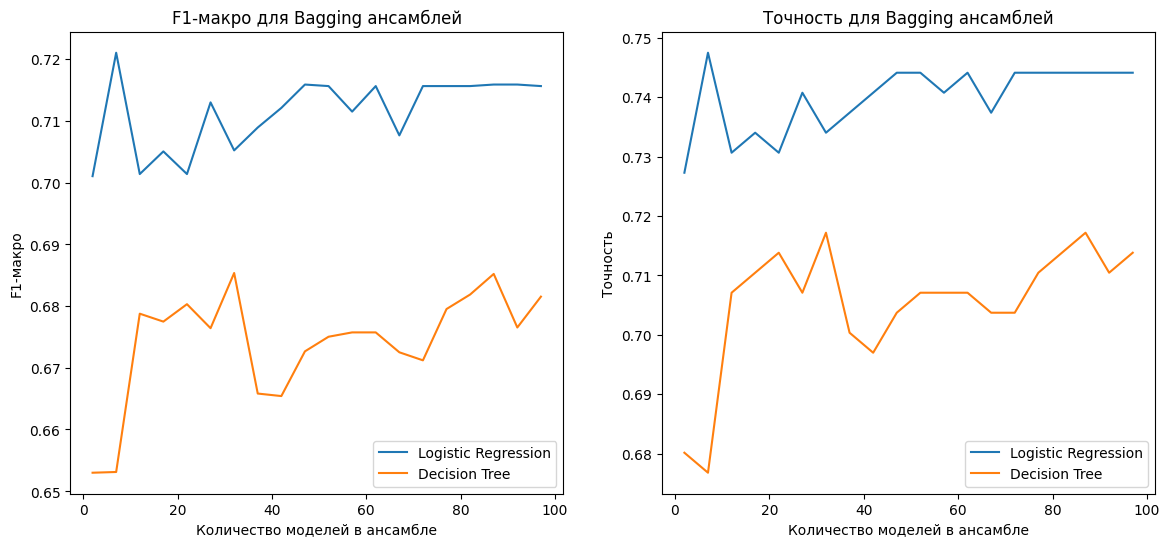

In [ ]:
import numpy as np
from sklearn.ensemble import BaggingClassifier

# Настраиваем ансамбли для логистической регрессии и решающих деревьев
ensemble_sizes = range(2, 101, 5)
f1_scores_log_reg = []
accuracy_scores_log_reg = []
f1_scores_tree = []
accuracy_scores_tree = []

# Настройка ансамбля для логистической регрессии
for n_estimators in ensemble_sizes:
    bagging_log_reg = BaggingClassifier(estimator=best_log_reg, n_estimators=n_estimators, random_state=42)
    bagging_log_reg.fit(X_train_balanced, y_train_balanced)
    y_pred_log_reg = bagging_log_reg.predict(X_test_var_filtered)
    f1_scores_log_reg.append(f1_score(y_test_encoded, y_pred_log_reg, average='macro'))
    accuracy_scores_log_reg.append(accuracy_score(y_test_encoded, y_pred_log_reg))

# Настройка ансамбля для решающих деревьев
for n_estimators in ensemble_sizes:
    bagging_tree = BaggingClassifier(estimator=best_tree_clf, n_estimators=n_estimators, random_state=42)
    bagging_tree.fit(X_train_balanced, y_train_balanced)
    y_pred_tree = bagging_tree.predict(X_test_var_filtered)
    f1_scores_tree.append(f1_score(y_test_encoded, y_pred_tree, average='macro'))
    accuracy_scores_tree.append(accuracy_score(y_test_encoded, y_pred_tree))

# Построение графиков F1 и точности в зависимости от количества алгоритмов
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_log_reg, label="Logistic Regression")
plt.plot(ensemble_sizes, f1_scores_tree, label="Decision Tree")
plt.xlabel("Количество моделей в ансамбле")
plt.ylabel("F1-макро")
plt.legend()
plt.title("F1-макро для Bagging ансамблей")

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_log_reg, label="Logistic Regression")
plt.plot(ensemble_sizes, accuracy_scores_tree, label="Decision Tree")
plt.xlabel("Количество моделей в ансамбле")
plt.ylabel("Точность")
plt.legend()
plt.title("Точность для Bagging ансамблей")

plt.show()


**Анализ результатов:**


1.   Оптимальное количество моделей: Оптимальное количество моделей можно выбрать по графикам F1 и точности. Обычно, после достижения некоторого числа моделей производительность ансамбля стабилизируется. Что мы и видим на текущих графиках (после 60-70 моделей).
2.   Результаты решающих деревьев и логистической регрессии: Решающие деревья показывают более высокую вариативность по сравнению с логистической регрессией из-за большей чувствительности к выборкам данных. Ансамбли деревьев часто показывают лучшие результаты на шумных данных.



#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Теперь используем Random Forest и построим графики F1 и точности в зависимости от количества деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Настройка и обучение Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': range(10, 200, 10)}
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Лучшая модель
best_rf = grid_search_rf.best_estimator_
print(f"Оптимальное количество деревьев: {grid_search_rf.best_params_['n_estimators']}")

# Оценка на тестовой выборке
y_pred_rf = best_rf.predict(X_test_var_filtered)
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)

print(f"F1-макро для Random Forest: {f1_rf:.4f}")
print(f"Точность для Random Forest: {accuracy_rf:.4f}")


Оптимальное количество деревьев: 30
F1-макро для Random Forest: 0.6946
Точность для Random Forest: 0.7273


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Для анализа влияния размера обучающей выборки на модели построим кривые обучения.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

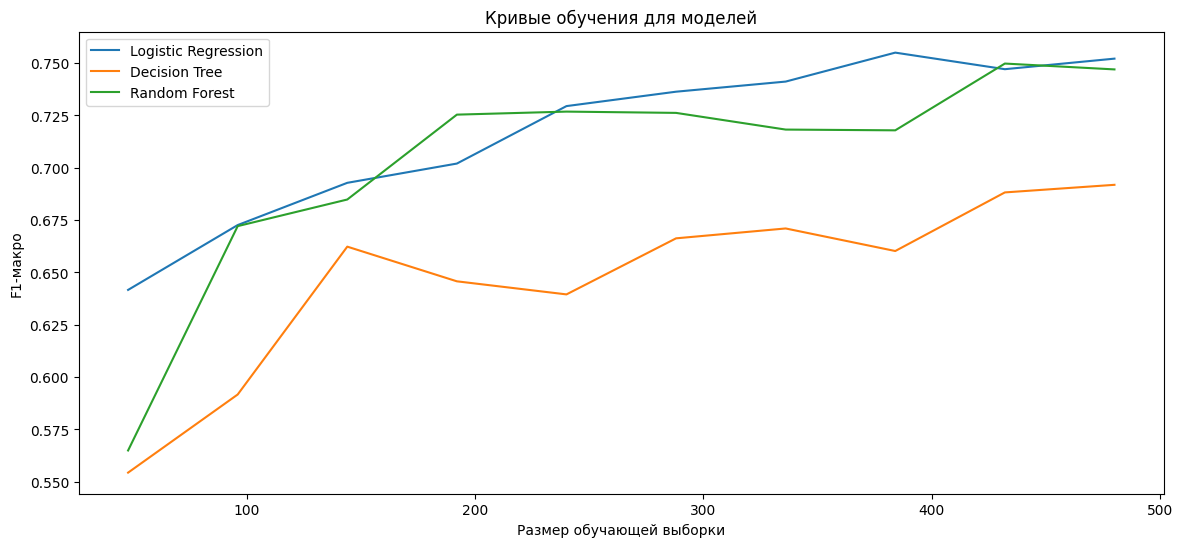

In [ ]:
from sklearn.model_selection import learning_curve

# Модели с оптимальными гиперпараметрами
models = [best_log_reg, best_tree_clf, best_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
train_sizes = np.linspace(0.1, 1.0, 10)

# Построение кривых обучения
plt.figure(figsize=(14, 6))

for i, model in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_balanced, y_train_balanced,
                                                            train_sizes=train_sizes, cv=5, scoring='f1_macro')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, test_mean, label=model_names[i])

plt.xlabel("Размер обучающей выборки")
plt.ylabel("F1-макро")
plt.legend()
plt.title("Кривые обучения для моделей")
plt.show()


**Общая интерпретация**


*   Logistic Regression и Random Forest показывают схожие результаты по мере увеличения обучающей выборки, выходя на плато при F1 около 0.75.
*   Decision Tree имеет более низкие значения F1-метрики и медленно приближается к плато (F1 около 0.7).

**Подробный анализ**

**Logistic Regression**


*   Результаты стабильны на всех этапах обучения.
*   F1-метрика плавно растёт с увеличением данных, достигая максимума около 0.75.
*   F1-метрика плавно растёт с увеличением данных, достигая максимума около 0.75.
Логистическая регрессия хорошо справляется на сбалансированных и линейно разделимых данных, что может говорить о качестве признаков после PCA.


**Random Forest**


*   В начале модель демонстрирует небольшой разрыв в качестве относительно Logistic Regression, но быстро достигает сравнимых результатов.
*   Это связано с тем, что Random Forest хорошо обобщает данные даже при наличии шумов.

**Decision Tree**


*   Значительно отстаёт от двух других моделей, особенно на малых размерах обучающей выборки.
*   Более выраженное плато на F1 около 0.7 говорит о том, что дерево решений переобучается или плохо справляется с многоклассовой задачей.
*   Этот метод менее устойчив к шуму в данных и может страдать от недостатка глубины или несбалансированности данных.

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Для бустинга используем библиотеку XGBoost, чтобы построить оптимальный ансамбль.

In [ ]:
import xgboost as xgb

# Инициализация и настройка модели XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Поиск оптимальных гиперпараметров
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1_macro')
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# Лучшая модель
best_xgb = grid_search_xgb.best_estimator_
print(f"Оптимальные параметры для XGBoost: {grid_search_xgb.best_params_}")

# Оценка на тестовой выборке
y_pred_xgb = best_xgb.predict(X_test_var_filtered)
f1_xgb = f1_score(y_test_encoded, y_pred_xgb, average='macro')
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)

print(f"F1-макро для XGBoost: {f1_xgb:.4f}")
print(f"Точность для XGBoost: {accuracy_xgb:.4f}")


Оптимальные параметры для XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}
F1-макро для XGBoost: 0.7342
Точность для XGBoost: 0.7576
